In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.io.img_tiles as cimgt
import pandas as pd
import os
# import Tkinter as tkinter

In [2]:
# Import the spreadsheet
df = pd.read_csv('Dates and Locations Witchcraft in Spain IPH450 20201130 - Witch Tracking.csv')
df.head()

,Date,Latitude,Longitude,Number Accused,Number Executed,Title,Notes,Source,Page Number
0,149601,42.930806,-1.351591,1,0,Navarre,"No exact location was given. ""Sect of witches ...",The Salazar Documents : Insquisitor Alonso De ...,NaN
1,152601,42.871551,-1.127755,200,50,Navarre,Unknown number executed by Judge Pedro de la B...,https://dukespace.lib.duke.edu/dspace/bitstrea...,71
2,153401,42.946038,-1.231051,1,0,Aezcoa,A Solitary Witch Maria Sagardoy,https://dukespace.lib.duke.edu/dspace/bitstrea...,75
3,153501,41.647176,-0.887571,2,2,Zaragoza,2 witch burnings,The Salazar Documents : Insquisitor Alonso De ...,10
4,153901,42.905917,-1.090617,1,0,Ochagavia,Fortuno Legaz,https://dukespace.lib.duke.edu/dspace/bitstrea...,233


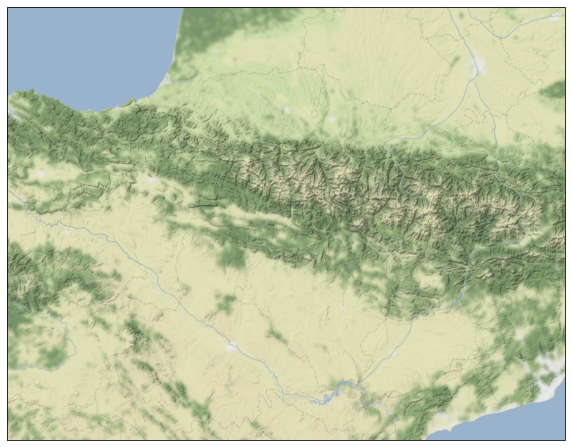

In [3]:
#Make an empty map
fig = plt.figure(figsize=(10,10))
stamen_terrain = cimgt.Stamen('terrain-background')

ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
ax.set_extent([-3,2.25,41,44], crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 8)

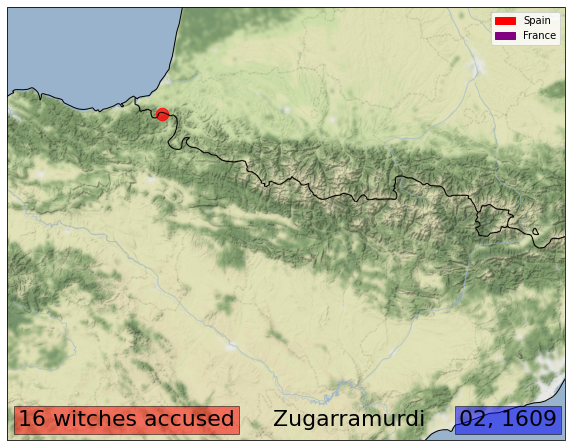

In [4]:
# Create the figure
fontsize = 22
def make_witch_map(date, df, ax=None, resolution='low'):
    global stamen_terrain
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
        ax.add_image(stamen_terrain, 8)
    
    row = df[df['Date']==date]
    date = str(date)
    year = date[:4]
    month = date[4:6]
    if not row.empty:
        lat = row['Latitude'].values
        long = row['Longitude'].values
        size = row['Number Accused'].values
        locations = row['Title'].values
        title = row['Title'].values[0]
    
        ax.text(-.5, 41.10, title, fontsize=fontsize,
       transform=ccrs.PlateCarree())
        ax.text(-2.9, 41.10, str(sum(size)) + " witches accused", fontsize=fontsize,
       transform=ccrs.PlateCarree(), bbox=dict(facecolor='red', alpha=0.5))
        if title == 'Pays de Labourd':
            color = 'purple'
        else:
            color = 'red'
        ax.scatter(long, lat, s=[10*s for s in size],c=color,alpha=.75, transform=ccrs.PlateCarree())
        
    ax.set_extent([-3,2.25,41,44], crs=ccrs.Geodetic())
    
    spain = mpatches.Patch(color='red', label='Spain')
    france = mpatches.Patch(color='purple', label='France')
    ax.legend(handles=[spain, france])
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines()
    ax.add_image(stamen_terrain,8)
    ax.text(1.25,41.1,month + ", " + year,fontsize=fontsize,
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='blue',alpha=.5))
    
make_witch_map(160902, df)

In [5]:
frame = 0
fig = plt.figure(figsize=(10,10))
stamen_terrain = cimgt.Stamen('terrain-background')

## Make all the dataframes
# for year in range(1496, 1676):
#     for month in range(1, 13):
#         year = str(year)
#         if month < 10:
#              month = '0'+str(month)
#         else:
#             month = str(month)
#         date = year+month
#         date = int(date)
#         ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
#         ax.add_image(stamen_terrain, 8)
#         make_witch_map(date, df, ax=ax)
#         fig.tight_layout(pad=-0.5)
#         fig.savefig(f"frames/frame_{frame}.png",dpi=100,facecolor='black')
#         frame+=1
#         fig.clear()


# for index, row in df.iterrows():
#     date = row['Date']
#     ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
#     ax.add_image(stamen_terrain, 8)
#     make_witch_map(date, df, ax=ax)
#     fig.tight_layout(pad=-0.5)
#     fig.savefig(f"active_frames/frame_{frame:04d}.png",dpi=100,facecolor='black')
#     frame+=1
#     fig.clear()

<Figure size 720x720 with 0 Axes>

In [6]:
frame = 0 
for date in df.Date.unique():
    ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
    ax.add_image(stamen_terrain, 8)
    make_witch_map(date, df, ax=ax)
    fig.tight_layout(pad=-0.5)
    fig.savefig(f"active_frames/frame_{frame:04d}.png",dpi=100,facecolor='black')
    frame+=1
    fig.clear()

In [ ]:
current_pos = 0 
def key_event(e):
    global current_pos
    global stamen_terrain
    if e.key == 'right':
        current_pos += 1
    elif e.key == 'left':
        current_pos -= 1
    if current_pos < 0:
        current_pos == 0
    if current_pos > len(df.Date.unique())-1:
        current_pos = len(df.Date.unique())-1
    
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
        ax.add_image(stamen_terrain, 8)
    
    row = df[df['Date']==df.Date.unique()[current_pos]]
    lat = row['Latitude'].values
    long = row['Longitude'].values
    size = row['Number Accused'].values
    locations = row['Title'].values
    title= row['Title'].values[0]

    ax.text(-.5, 41.10, title, fontsize=fontsize,
                       transform=ccrs.PlateCarree())
    ax.text(-2.9, 41.10, str(sum(size)) + " witches accused", fontsize=fontsize,
                           transform=ccrs.PlateCarree(), bbox=dict(facecolor='red', alpha=0.5))
    if title == 'Pays de Labourd':
        color = 'purple'
    else:
        color = 'red'
    ax.scatter(long, lat, s=[10*s for s in size],c=color,alpha=.75, transform=ccrs.PlateCarree())
    
    fig.tight_layout(pad=-0.5)
    
fig = plt.figure(figsize=(10,10))
stamen_terrain = cimgt.Stamen('terrain-background')
ax = fig.add_subplot(1,1,1, projection=stamen_terrain.crs)
ax.add_image(stamen_terrain, 8)
fig.canvas.mpl_connect('key_press_event', key_event)

5

<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlop

/Users/oliverkcohen/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlop